## Introduction

The dataset provides 14 input variables that are a mixture of categorical, ordinal, and numerical data types. The complete list of variables is as follows:
* Age
* Workclass
* Final Weight.
* Education.
* Education Number of Years.
* Marital-status.
* Occupation.
* Relationship.
* Race.
* Sex.
* Capital-gain.
* Capital-loss.
* Hours-per-week.
* Native-country.

The dataset contains missing values that are marked with a question mark character (?).

There are a total of 48,842 rows of data, and 3,620 with missing values, leaving 45,222 complete rows.

There are two class values ‘>50K‘ and ‘<=50K‘, meaning it is a binary classification task. The classes are imbalanced, with a skew toward the ‘<=50K‘ class label.

‘>50K’: majority class, approximately 25%.
‘<=50K’: minority class, approximately 75%.

  Given that the class imbalance is not severe and that both class labels are equally important, it is common to use classification accuracy or classification error to report model performance on this dataset.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\jakku\Desktop\adult.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


##  Find the Null values

In [8]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<AxesSubplot:>

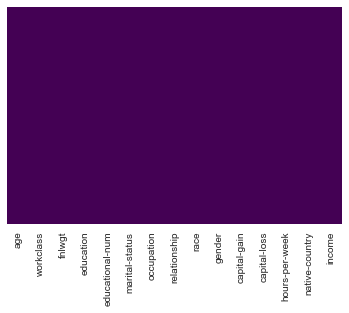

In [9]:
# Checking with null values with visualization, There is no null values.
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Observation:
* Here, no null values

## occupation

In [10]:
df["occupation"].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

### income

In [11]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

### native-country

In [12]:
df["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

### workclass 

In [13]:
df["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

### Replace the missing values

In [14]:
df["occupation"]=df["occupation"].replace('?', 'prof-specialty')

In [15]:
df["native-country"]=df["native-country"].replace('?',"United-States")

In [16]:
df["workclass"]=df["workclass"].replace('?','Private')

In [17]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Observation
* Here, Missing values are replaced with the data.

In [18]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## finding correlations all non categorical data

In [19]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


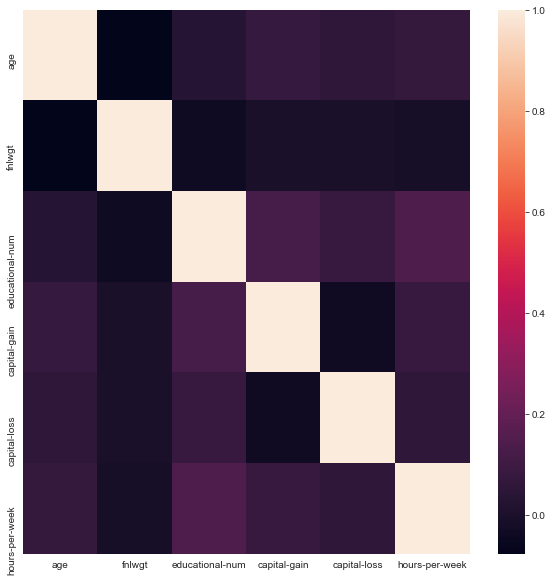

In [20]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

## Find and treat the outliers

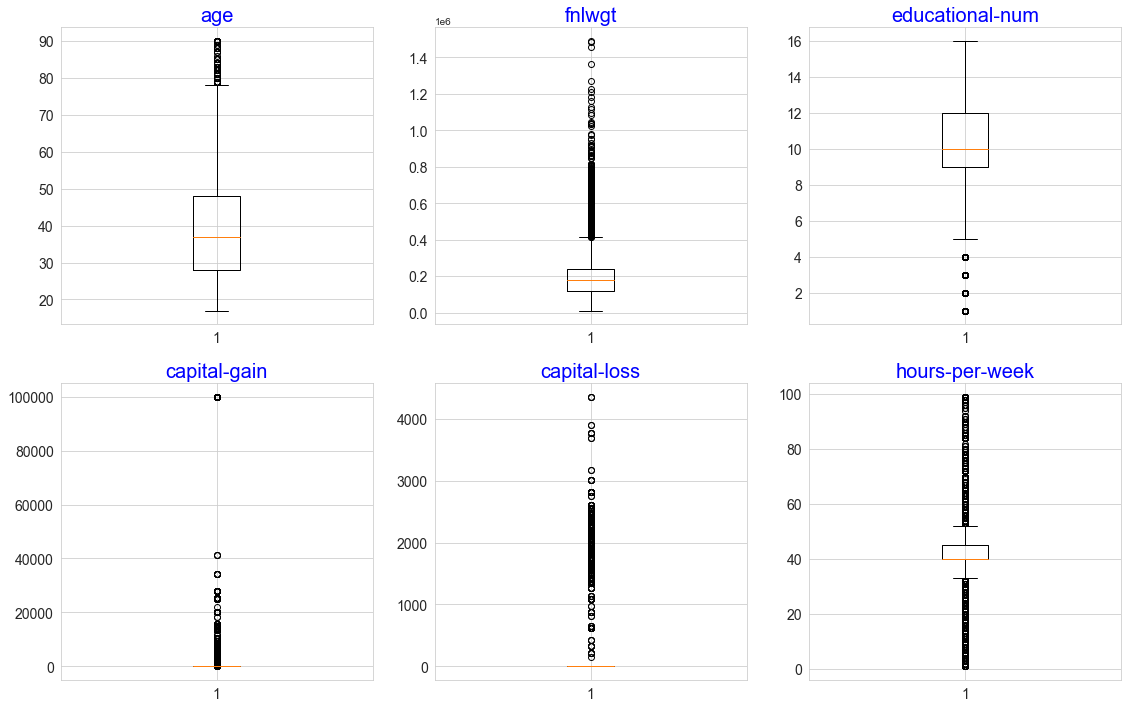

In [21]:
plt.figure(figsize=(19,12))


num_features = df.select_dtypes(include=['int64']).columns
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[num_features[i]])
    plt.title(num_features[i],color="b",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

## Observations
* We using boxplot we found the outliers in the numerical data.
* Boxplot used to find the outliers in the dataset.
* In numerical data we have lot of outliers.

In [22]:
catg_var=[]
num_var=[]

for col in df.columns:
    if (df[col].dtypes=='object'):
        catg_var.append(col)
    else:
        num_var.append(col)

In [23]:
print(catg_var)
print(num_var)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


## Observations
* Here we divided dataset to numerical and categorical data seperately.

In [24]:
from collections import Counter

In [25]:
def detect_outliers(df,features):
    outlier_indices = []
    for c in features:
        Q1 =df[c].quantile(0.25)
        Q3 =df[c].quantile(0.75)
        IQR = Q3 - Q1
        outlier_list_col =df[(df[c] < (Q1 - 1.5 * IQR)) |(df[c] > (Q3 + 1.5 * IQR))].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [26]:
df1=df.loc[detect_outliers(df,num_var)]

## Observations
* Here we use IQR method for Outliers.
* Using IQR method to treat the outliers.
* Lower and Upper Bound to treat the outliers.

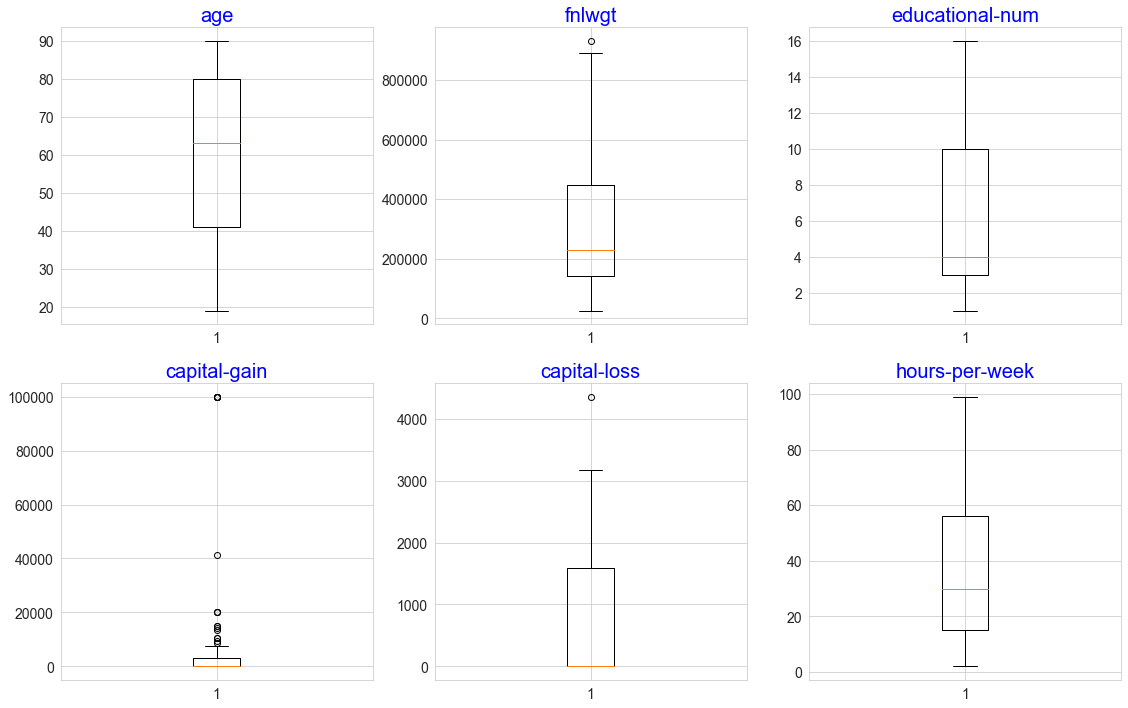

In [27]:
plt.figure(figsize=(19,12))


num_features = df1.select_dtypes(include=['int64']).columns
for i in range(len(num_features)):
    plt.subplot(2,3,i+1)
    plt.boxplot(df1[num_features[i]])
    plt.title(num_features[i],color="b",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

## Observations
* We removed the outliers using IQR Method.
* In the above plot shows that how many outliers are removed.

# Univariate Analysis

### Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

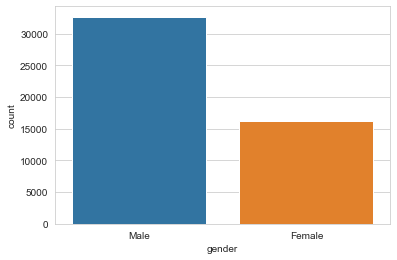

In [28]:
sns.countplot(x='gender', data=df)

### Age

<AxesSubplot:xlabel='age'>

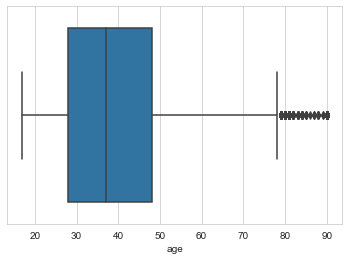

In [29]:
sns.boxplot(x='age',data=df)

<AxesSubplot:xlabel='age'>

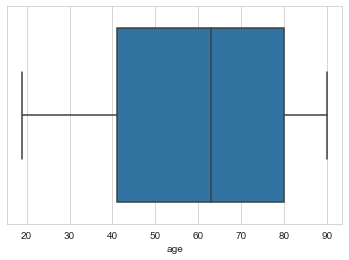

In [30]:
sns.boxplot(x='age',data=df1)

### Workclass

In [31]:
df["workclass"].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Local-gov'),
  Text(2, 0, 'Self-emp-not-inc'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'State-gov'),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'Without-pay'),
  Text(7, 0, 'Never-worked')])

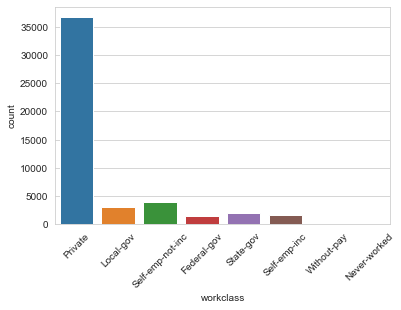

In [32]:
sns.countplot(x='workclass',data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Self-emp-inc'),
  Text(3, 0, 'Local-gov'),
  Text(4, 0, 'State-gov'),
  Text(5, 0, 'Federal-gov')])

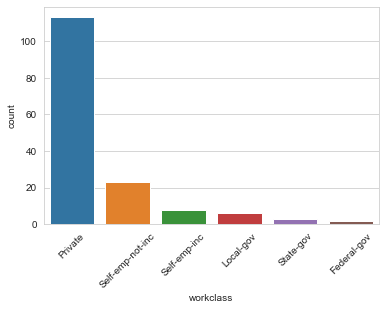

In [33]:
sns.countplot(x='workclass',data=df1)
plt.xticks(rotation=45)

### fnlwgt

<AxesSubplot:xlabel='fnlwgt'>

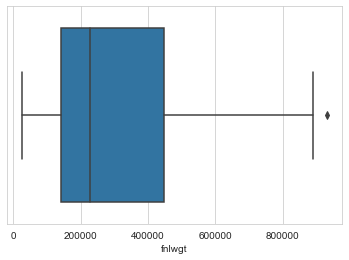

In [34]:
sns.boxplot(x="fnlwgt",data=df1)

### Education

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '7th-8th'),
  Text(1, 0, '5th-6th'),
  Text(2, 0, 'Prof-school'),
  Text(3, 0, '1st-4th'),
  Text(4, 0, 'Masters'),
  Text(5, 0, 'Some-college'),
  Text(6, 0, 'Assoc-voc'),
  Text(7, 0, '9th'),
  Text(8, 0, 'Bachelors'),
  Text(9, 0, 'HS-grad'),
  Text(10, 0, '10th'),
  Text(11, 0, 'Assoc-acdm'),
  Text(12, 0, 'Doctorate'),
  Text(13, 0, 'Preschool')])

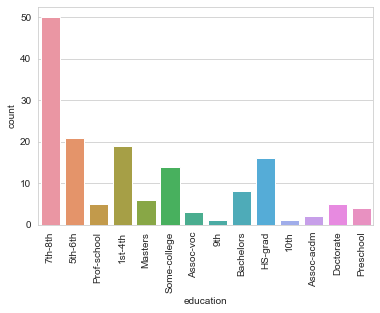

In [35]:
sns.countplot(x='education',data=df1)
plt.xticks(rotation=90)

In [36]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Education-Num

<AxesSubplot:xlabel='educational-num'>

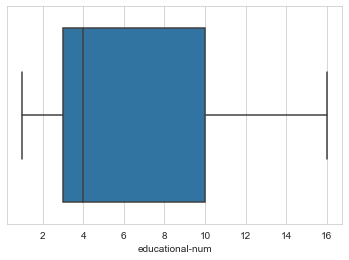

In [37]:
sns.boxplot(x="educational-num",data=df1)

###  Marital-status


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Widowed'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Separated'),
  Text(3, 0, 'Never-married'),
  Text(4, 0, 'Married-spouse-absent'),
  Text(5, 0, 'Divorced')])

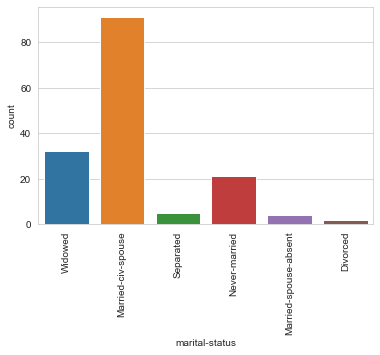

In [38]:
sns.countplot(x='marital-status', data=df1)
plt.xticks(rotation=90)

### Occupation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Machine-op-inspct'),
  Text(1, 0, 'prof-specialty'),
  Text(2, 0, 'Other-service'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Farming-fishing'),
  Text(5, 0, 'Exec-managerial'),
  Text(6, 0, 'Sales'),
  Text(7, 0, 'Handlers-cleaners'),
  Text(8, 0, 'Adm-clerical'),
  Text(9, 0, 'Priv-house-serv'),
  Text(10, 0, 'Transport-moving'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Craft-repair')])

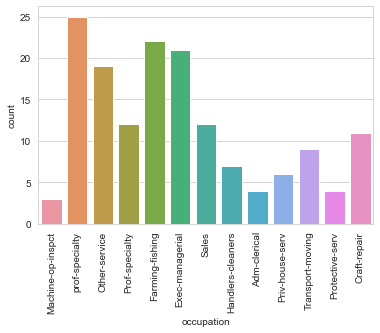

In [39]:
sns.countplot(x='occupation', data=df1)
plt.xticks(rotation=90)

### Relationship

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unmarried'),
  Text(1, 0, 'Husband'),
  Text(2, 0, 'Not-in-family'),
  Text(3, 0, 'Own-child'),
  Text(4, 0, 'Other-relative'),
  Text(5, 0, 'Wife')])

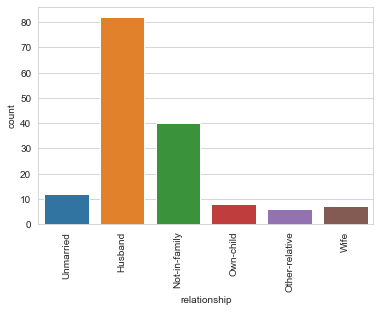

In [40]:
sns.countplot(x='relationship', data=df1)
plt.xticks(rotation=90)

### Race

(array([0, 1, 2, 3]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Other')])

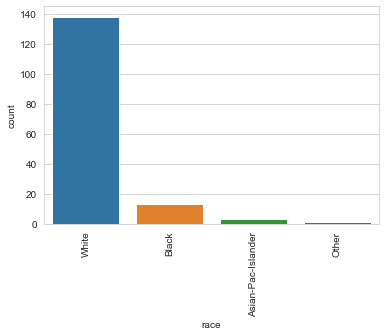

In [41]:
sns.countplot(x='race', data=df1)
plt.xticks(rotation=90)

### Capital - Gain

Text(0, 0.5, 'Frequency')

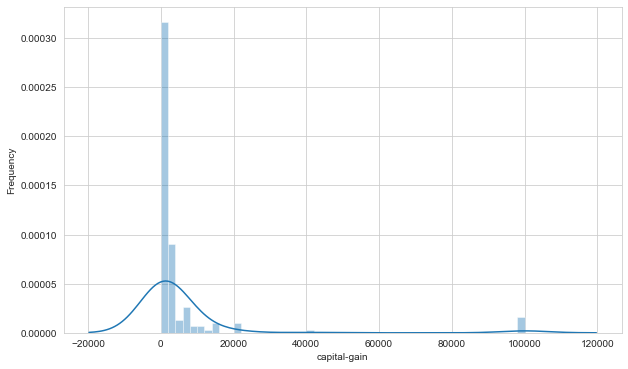

In [42]:
plt.figure(figsize=(10,6))
sns.distplot(df1['capital-gain'])
plt.ylabel('Frequency')

In [43]:
df['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital-gain, Length: 123, dtype: int64

<AxesSubplot:xlabel='capital-gain'>

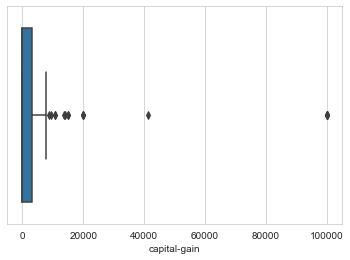

In [44]:
sns.boxplot(x='capital-gain', data=df1)

### Capital - Loss

<AxesSubplot:xlabel='capital-loss'>

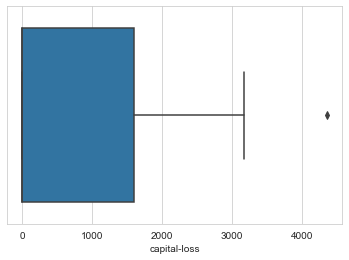

In [45]:
sns.boxplot(x='capital-loss', data=df1)

### Hours-Per-Week

<AxesSubplot:xlabel='hours-per-week'>

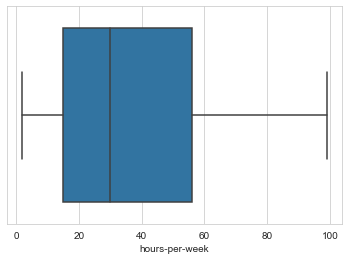

In [46]:
sns.boxplot(x='hours-per-week', data=df1)

### Native - Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Portugal'),
  Text(2, 0, 'Philippines'),
  Text(3, 0, 'Poland'),
  Text(4, 0, 'Hungary'),
  Text(5, 0, 'Nicaragua'),
  Text(6, 0, 'Mexico'),
  Text(7, 0, 'El-Salvador'),
  Text(8, 0, 'Guatemala'),
  Text(9, 0, 'Yugoslavia'),
  Text(10, 0, 'Jamaica'),
  Text(11, 0, 'Puerto-Rico'),
  Text(12, 0, 'Italy'),
  Text(13, 0, 'Canada')])

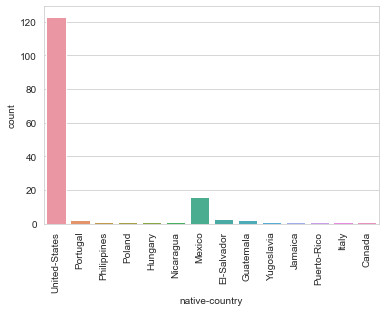

In [47]:
sns.countplot(x='native-country', data=df1)
plt.xticks(rotation=90)

### Income
#### converting output data to binary form if income <=50k :0 and if income>50k :1

In [48]:
df1['income'].value_counts()

<=50K    117
>50K      38
Name: income, dtype: int64

In [49]:
df1['income'].replace(to_replace='>50K',value=0,inplace=True)
df1['income'].replace(to_replace='<=50K',value=1,inplace=True)

In [50]:
df1['income'].value_counts()

1    117
0     38
Name: income, dtype: int64

<AxesSubplot:xlabel='income'>

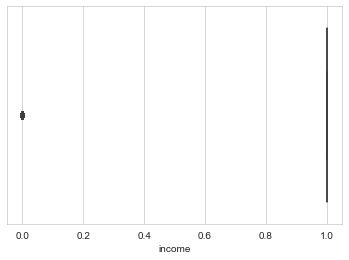

In [51]:
sns.boxplot(x="income",data=df1)

* In above dataset we cleaned the dataset and we treat the outliers in the range of 25% to 75% using IQR Moethod.we plot different types of plots for understanding the data.


In [52]:
df1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1079,81,Private,184615,7th-8th,4,Widowed,Machine-op-inspct,Unmarried,White,Female,1264,0,40,United-States,1
1834,83,Private,29702,7th-8th,4,Married-civ-spouse,prof-specialty,Husband,White,Male,0,0,20,United-States,1
2982,80,Private,216073,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,Male,0,0,32,United-States,1
3496,90,Self-emp-not-inc,83601,Prof-school,15,Widowed,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,1
4646,81,Private,143732,1st-4th,2,Widowed,prof-specialty,Not-in-family,White,Male,0,0,30,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43276,33,Private,228696,1st-4th,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,0,2603,32,Mexico,1
43445,50,Private,95435,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1579,65,Canada,1
44488,78,Private,184759,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,1797,0,15,United-States,1
46404,63,Self-emp-not-inc,29859,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,7688,0,60,United-States,0
